In [15]:
import matplotlib
%matplotlib inline

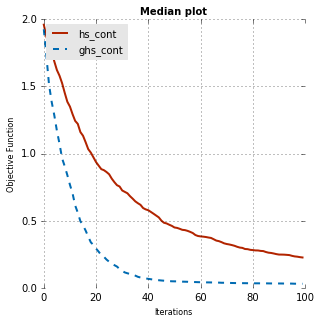

In [79]:
import glob
from pylab import *
import brewer2mpl

import sys

 # brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set1', 'qualitative', 5)
colors = bmap.mpl_colors
 
params = {
    'axes.labelsize': 8,
    'font.size': 8,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)


def load(dir):
    f_list = glob.glob(dir + '/*/fitness.csv')
    num_lines = sum(1 for line in open(f_list[0]))
    i = 0;
    data = np.zeros((len(f_list), num_lines)) 
    for f in f_list:
        data[i, :] = np.loadtxt(f)[:,1]
        i += 1
    return data


data_hs = load('data/hs_cont/fitness')
data_ghs = load('data/ghs_cont/fitness')
# data_ghs_1 = load('data/ghs_cont_1/fitness')
# data_ghs_2 = load('data/ghs_cont_2/fitness')
# data_ghs_3 = load('data/ghs_cont_3/fitness')
# data_ghs_4 = load('data/ghs_cont_4/fitness')
# data_ghs_5 = load('data/ghs_cont_5/fitness')
# data_ghs_6 = load('data/ghs_cont_6/fitness')

n_generations = data_hs.shape[1]
x = np.arange(0, n_generations)

# compute the median of each column
def med(data):
    median = np.zeros(data.shape[1])
    for i in range(0, len(median)):
        median[i] = np.median(data[:, i])
    return median

med_hs = med(data_hs)
med_ghs = med(data_ghs)
# med_ghs1 = med(data_ghs_1)
# med_ghs2 = med(data_ghs_2)
# med_ghs3 = med(data_ghs_3)
# med_ghs4 = med(data_ghs_4)
# med_ghs5 = med(data_ghs_5)
# med_ghs6 = med(data_ghs_6)

fig = figure()
# xlim(-1, n_generations)
# ylim(-10, 10)

axes(frameon=0)
grid()

plot(x, med_hs, linewidth=2, color='#B22400')
plot(x, med_ghs, linewidth=2, linestyle='--', color='#006BB2')
# plot(x, med_ghs1, linewidth=2, linestyle='-', color='b')
# plot(x, med_ghs2, linewidth=2, linestyle='-.', color='g')
# plot(x, med_ghs3, linewidth=2, linestyle='-', color='r')
# plot(x, med_ghs4, linewidth=2, linestyle='-.', color='c')
# plot(x, med_ghs5, linewidth=2, linestyle='--', color='m')
# plot(x, med_ghs6, linewidth=2, linestyle='-.', color='y')

xlim(-1, n_generations)
# ylim(0, 0.1)
xlabel('Iterations')
ylabel('Objective Function')
title("Median plot",
         fontsize=10, weight='semibold')
# legend = legend(["hs_cont", "ghs_cont", "ghs_cont_1", "ghs_cont_2", "ghs_cont_3", "ghs_cont_4", "ghs_cont_5", "ghs_cont_6"], loc=2);
legend = legend(["hs_cont", "ghs_cont"], loc=2);
# legend = legend(["ghs_cont", "ghs_cont_m"], loc=2);
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
# xticks(np.arange(0, 50, 5))
fig.tight_layout()
savefig('plots/median_sphere2.png')
show()

In [ ]:
df[df['fitness'].apply(lambda x: x > 0.002)] = 0.001 

In [ ]:
med_ghs[med_ghs[] > 255] = x

In [55]:
med_ghs[med_ghs > 0.1] = 0.1
med_ghs1[med_ghs1 > 0.1] = 0.1

In [53]:
med_ghs

array([ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.09074772,  0.08194861,  0.07670936,  0.07245924,  0.06965317,
        0.06674225,  0.06376038,  0.06075492,  0.05758329,  0.05635681,
        0.05446304,  0.05289321,  0.05105723,  0.04979479,  0.04855605,
        0.04811868,  0.04805993,  0.04750785,  0.04597503,  0.04540789,
        0.04489684,  0.04317658,  0.04317658,  0.04273075,  0.04196946,
        0.0414917 ,  0.0403978 ,  0.04038082,  0.04022043,  0.0399318 ,
        0.03953125,  0.03904866,  0.03862066,  0.03756422,  0.03

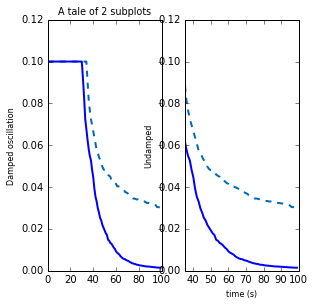

In [77]:
subplot(1, 2, 1)
plot(x, med_ghs, linewidth=2, linestyle='--', color='#006BB2')
plot(x, med_ghs1, linewidth=2, linestyle='-', color='b')
title('A tale of 2 subplots')
ylabel('Damped oscillation')

## cute some values
med_ghs_s  = med_ghs
med_ghs_s[med_ghs_s > 0.1] = 0.1
med_ghs1_s = med_ghs1
med_ghs1_s[med_ghs1_s > 0.1] = 0.1

subplot(1, 2, 2)
plot(x, med_ghs_s, linewidth=2, linestyle='--', color='#006BB2')
plot(x, med_ghs1_s, linewidth=2, linestyle='-', color='b')
xlabel('time (s)')
ylabel('Undamped')
xlim(35, n_generations)
show()